# 2 Lab

Изменим размер картинки и покажем в трех вариантах + оригинал

In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

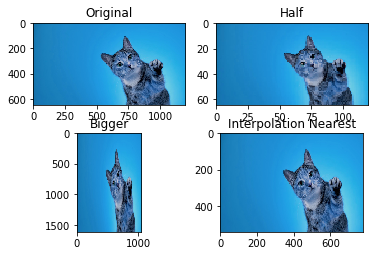

In [3]:

image = cv2.imread('unnamed.jpg', 1) 

  
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1) 
bigger = cv2.resize(image, (1050, 1610))   
stretch_near = cv2.resize(image, (780, 540), interpolation = cv2.INTER_NEAREST) 
  
  
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"] 
images =[image, half, bigger, stretch_near] 
count = 4
  
for i in range(count): 
    plt.subplot(2, 2, i + 1) 
    plt.title(Titles[i]) 
    plt.imshow(images[i]) 
  
plt.show() 

Попробуем размытие картинки по Гауссу, медиане и двустороннюю фильтрацию

In [4]:

img = cv2.imread('unknown.jpg') 
   
avging = cv2.blur(img,(10,10)) 
   
cv2.imshow('Averaging',avging) 
cv2.waitKey(0) 
# Gaussian blurring  
gausBlur = cv2.GaussianBlur(img, (5,5),0)  
cv2.imshow('Gaussian Blurring', gausBlur) 
cv2.waitKey(0) 
  
# Median blurring 
medBlur = cv2.medianBlur(img,5) 
cv2.imshow('Media Blurring', medBlur) 
cv2.waitKey(0) 
  
# Bilateral Filtering 
bilFilter = cv2.bilateralFilter(img,9,75,75) 
cv2.imshow('Bilateral Filtering', bilFilter) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Покажем пирамиду изображения

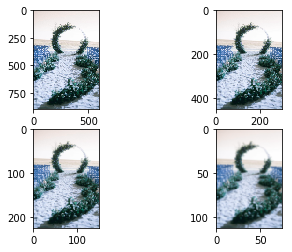

In [5]:
img = cv2.imread('wedding.jpg') 
  
layer = img.copy() 
  
for i in range(4): 
    plt.subplot(2, 2, i + 1) 
  
    layer = cv2.pyrDown(layer) 
  
    plt.imshow(layer) 
    cv2.imshow("str(i)", layer) 
    cv2.waitKey(0) 
      
  


Найдем углы в картинке

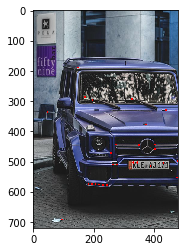

(<matplotlib.image.AxesImage at 0x12171deb8>, None)

In [6]:
img = cv2.imread('unknown-2.jpg') 
  
# преобразуем изображение в полутоновое изображение
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# выявляем углы с помощью функции goodFeaturesToTrack()
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10) 
corners = np.int0(corners) 
  
# перебираем каждый угол, то есть рисуя круг в каждой точке, которую мы считаем углом
for i in corners: 
    x, y = i.ravel() 
    cv2.circle(img, (x, y), 3, 255, -1) 
  
plt.imshow(img), plt.show() 

И перевернем наше изображение

In [7]:
img = cv2.imread('dir.jpg')
rows, cols, ch = img.shape

matrix_r = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.5)
rotated_img = cv2.warpAffine(img, matrix_r, (cols, rows))

cv2.imshow("Original", img)
cv2.imshow("Rotated", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()